In [45]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [46]:
DIRECTORY= r"E:\download\Rice"
CATAGORIES=['brown_spot','bacterial_leaf_blight','healthy','leaf_blast','leaf_scald','neck_blast','sheath blight','rice hispa','narrow_brown_spot','Tungro']


In [47]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)


        
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(224,224))
        
        data.append([img_arr,label])

In [48]:
random.shuffle(data)

In [49]:
x=[]
y=[]
for features,label in data:
    x.append(features)
    y.append(label)

In [50]:
X= np.array(x)
Y=np.array(y)

In [51]:
X = X.astype('float32') / 255.0

In [52]:
X.shape

(3422, 224, 224, 3)

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [54]:
model=Sequential()

model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [55]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
model.fit(X,Y,epochs=5,validation_split=0.2)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - accuracy: 0.4315 - loss: 1.6372 - val_accuracy: 0.5445 - val_loss: 1.2871
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.6522 - loss: 1.0338 - val_accuracy: 0.7080 - val_loss: 0.9056
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - accuracy: 0.7727 - loss: 0.7211 - val_accuracy: 0.7635 - val_loss: 0.7222
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.7958 - loss: 0.6105 - val_accuracy: 0.7664 - val_loss: 0.6951
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.8524 - loss: 0.4455 - val_accuracy: 0.7635 - val_loss: 0.6918


In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,504 (2.81 MB)

 Trainable params: 245,834 (960.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 491,670 (1.88 MB)

In [58]:
from keras.preprocessing import image
import numpy as np
img_pred = image.load_img(r"E:\download\Rice\neck_Blast\IMG20201109210545_00.jpg",target_size=(224, 224))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred / 255.0

rslt = model.predict(img_pred)
class_labels = ["brown_spot","bacterial_leaf_blight","healthy","leaf_blast","leaf_scald","neck_blast","sheath_blight","rice_hispa","narrow_brown_spot","Tungro"]

predicted_class_index = np.argmax(rslt)
prediction = class_labels[predicted_class_index]
print("Predicted Disease:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Disease: neck_blast


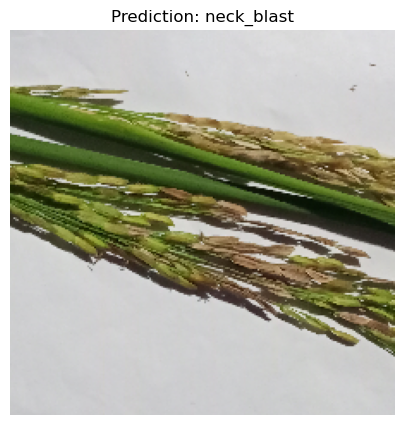

Model Accuracy: 82.03 %


In [59]:
import matplotlib.pyplot as plt
import numpy as np

display_img = (img_pred[0] * 255).astype(np.uint8)

plt.figure(figsize=(5,5))
plt.imshow(display_img)
plt.axis("off")
plt.title(f"Prediction: {prediction}")
plt.show()
print("Model Accuracy:", round(accuracy*100, 2), "%")

In [60]:
loss, accuracy = model.evaluate(X, Y, batch_size=64)

print("Model Loss:", round(loss, 4))
print("Model Accuracy:", round(accuracy*100, 2), "%")

54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.8548 - loss: 0.4435
Model Loss: 0.4435
Model Accuracy: 85.48 %


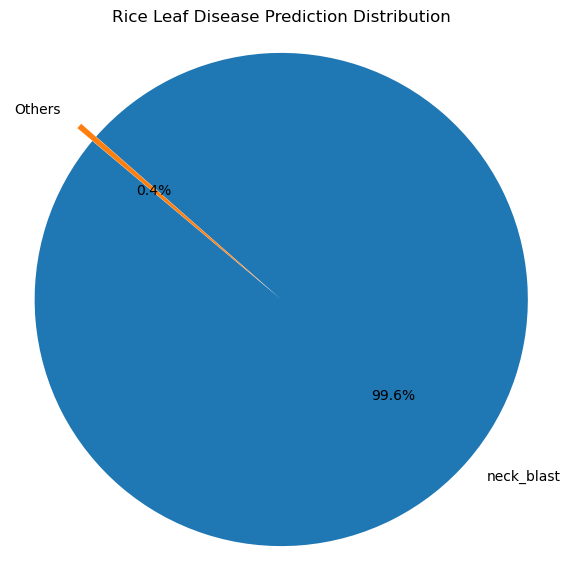

In [62]:
import numpy as np
import matplotlib.pyplot as plt

probs = rslt[0]
labels = class_labels

sorted_idx = np.argsort(probs)[::-1]
sorted_probs = probs[sorted_idx]
sorted_labels = np.array(labels)[sorted_idx]

threshold = 0.02  

main_probs = []
main_labels = []
others_prob = 0

for p, l in zip(sorted_probs, sorted_labels):
    if p >= threshold:
        main_probs.append(p)
        main_labels.append(l)
    else:
        others_prob += p

if others_prob > 0:
    main_probs.append(others_prob)
    main_labels.append("Others")

plt.figure(figsize=(7,7))
plt.pie(
    main_probs,
    labels=main_labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.08] + [0]*(len(main_probs)-1)
)
plt.title("Rice Leaf Disease Prediction Distribution")
plt.axis('equal')
plt.show()

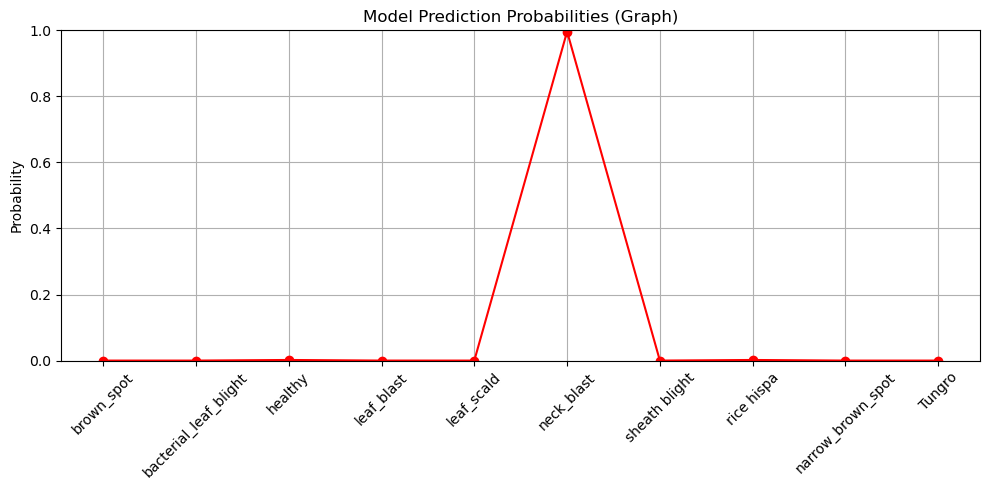

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(CATAGORIES, rslt[0], marker='o', linestyle='-', color='r') 
plt.xticks(rotation=45)
plt.ylabel("Probability")
plt.ylim(0,1)  
plt.title("Model Prediction Probabilities (Graph)")
plt.grid(True)
plt.tight_layout()
plt.show()


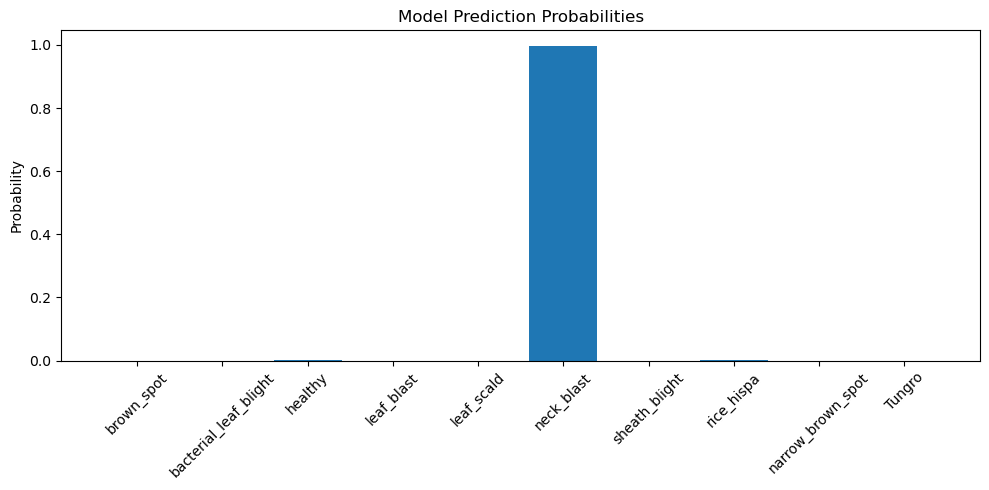

In [64]:
plt.figure(figsize=(10,5))
plt.bar(class_labels, rslt[0])
plt.xticks(rotation=45)
plt.ylabel("Probability")
plt.title("Model Prediction Probabilities")
plt.tight_layout()
plt.show()